In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
df.head(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,spam,sale sale sale,NaN,NaN,NaN


In [ ]:
df.shape

(5577, 5)

In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5527
Unnamed: 3,5565
Unnamed: 4,5571


In [ ]:
# 1. data cleaning
# 2. EDA
# 3. text preprocessing
# 4. model building
# 5. evaluation
# 6. improvement
# 7. deployment

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head()

,v1,v2
0,spam,sale sale sale
1,spam,Limited time offer!!! SALE SALE SALE  Buy 1 G...
2,spam,"Earn ?50,000 per month working from home! Sign..."
3,spam,URGENT: Your bank account has been suspended. ...
4,spam,free free free


In [ ]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.sample()

,target,text
3604,ham,I know you mood off today


In [ ]:
df.shape

(5577, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
encoder.fit_transform(df['target'])

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,1,sale sale sale
1,1,Limited time offer!!! SALE SALE SALE  Buy 1 G...
2,1,"Earn ?50,000 per month working from home! Sign..."
3,1,URGENT: Your bank account has been suspended. ...
4,1,free free free


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5174, 2)

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,658


EDA

([<matplotlib.patches.Wedge at 0x77fd926e6f90>,
 [Text(-1.0133683764517534, 0.4278837851654788, 'ham'),
  Text(1.0133684138585395, -0.42788369657399655, 'spam')],
 [Text(-0.5527463871555017, 0.2333911555448066, '87.28'),
  Text(0.5527464075592033, -0.2333911072221799, '12.72')])

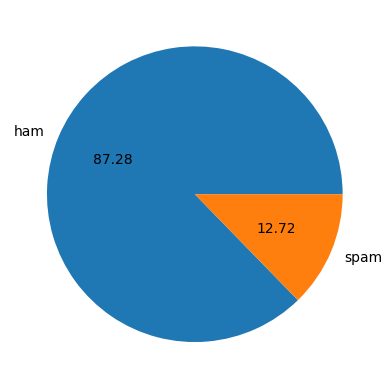

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head(1)

,target,text,num_characters
0,1,sale sale sale,14


In [ ]:
import re
df['num_words'] = df['text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import re
df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))

In [ ]:
df.head(1)

,target,text,num_characters,num_words,num_sentences
0,1,sale sale sale,14,3,0


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5174.000000,5174.000000,5174.000000
mean,78.942018,15.982219,1.846347
std,58.224169,11.516186,1.745052
min,2.000000,0.000000,0.000000
25%,36.000000,8.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,116.750000,23.000000,3.000000
max,910.000000,190.000000,39.000000


In [ ]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.600974,1.692648
std,56.358207,11.448193,1.681598
min,2.000000,0.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,19.000000,2.000000
max,910.000000,190.000000,39.000000


In [ ]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,658.000000,658.000000,658.000000
mean,137.161094,25.462006,2.901216
std,31.229667,6.359062,1.807552
min,13.000000,2.000000,0.000000
25%,131.250000,23.000000,2.000000
50%,148.000000,27.000000,3.000000
75%,157.000000,29.000000,4.000000
max,224.000000,40.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

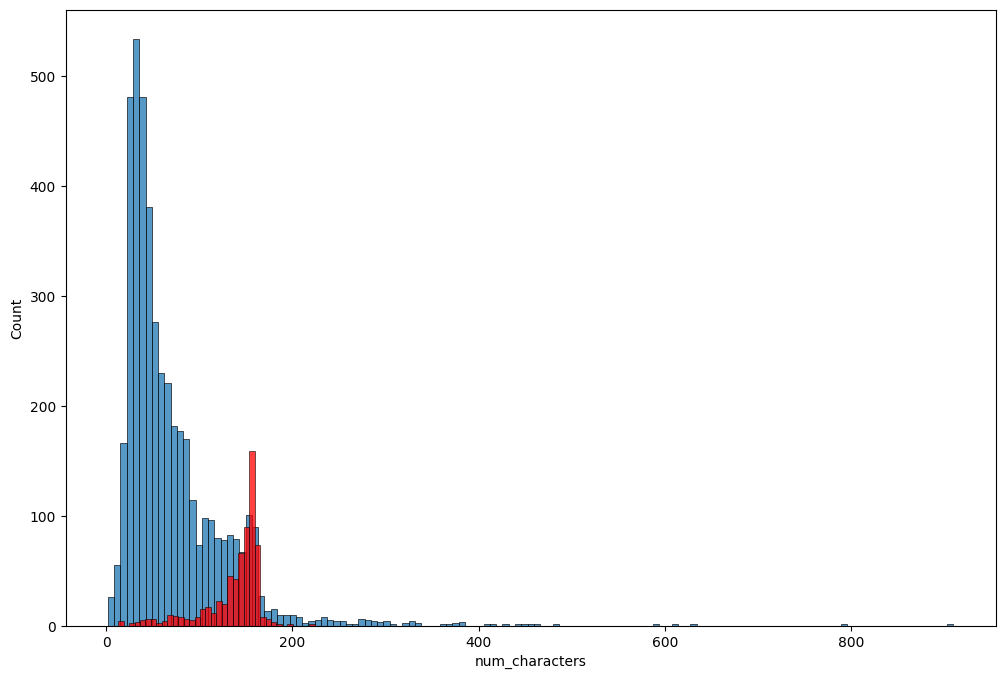

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

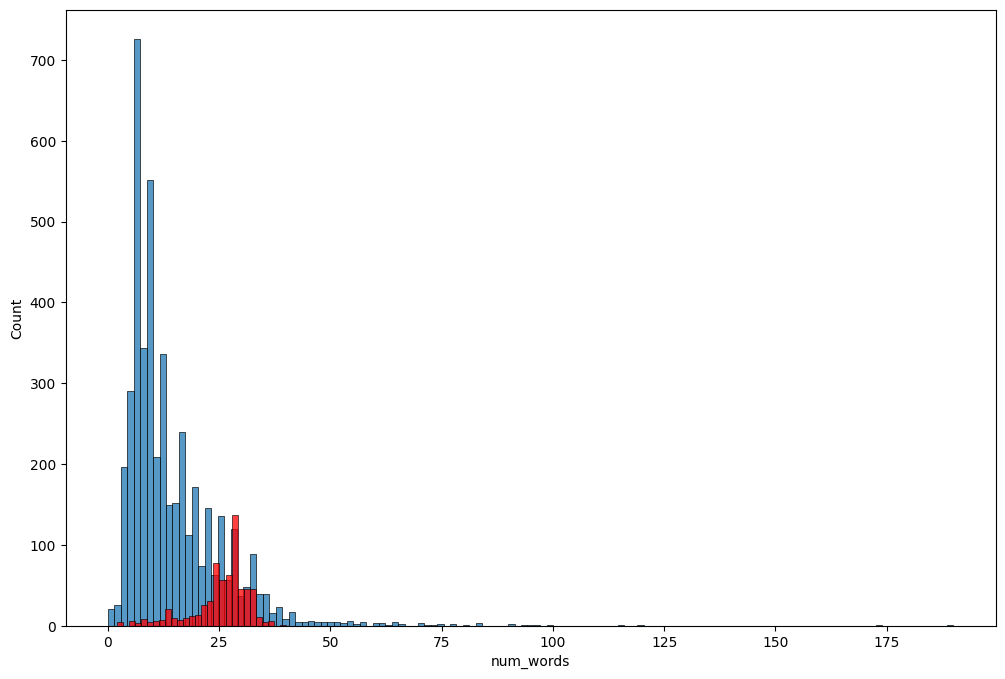

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

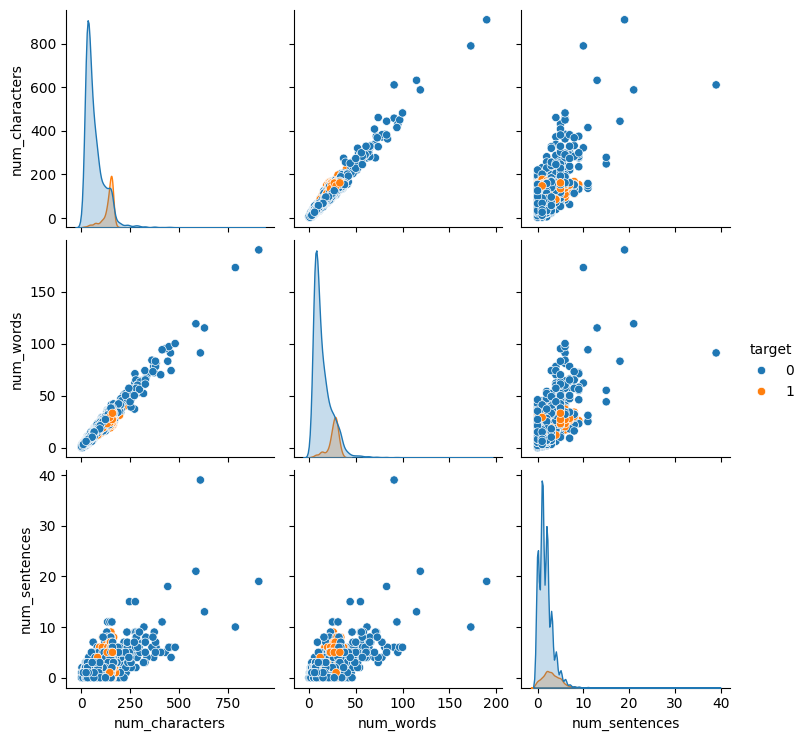

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

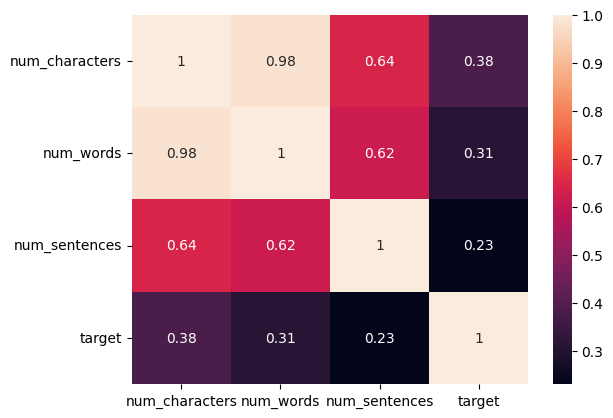

In [ ]:
numerical_df = df[['num_characters', 'num_words', 'num_sentences', 'target']]
sns.heatmap(numerical_df.corr(), annot=True)

Data Preprocessing

1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctutation
5. Stemming

In [ ]:
import nltk
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading the 'stopwords' resource...")
    try:
        nltk.download('stopwords')
        print("'stopwords' resource downloaded successfully.")
    except Exception as e:
        print(f"Error downloading 'stopwords': {e}")

In [ ]:


ps = PorterStemmer()

def transform_text(text):
  text=text.lower()            #to lowercase
  text=nltk.word_tokenize(text) # Corrected typo here
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,sale sale sale,14,3,0,sale sale sale
1,1,Limited time offer!!! SALE SALE SALE  Buy 1 G...,56,11,2,limit time offer sale sale sale buy 1 get 1 free
2,1,"Earn ?50,000 per month working from home! Sign...",54,11,3,earn per month work home sign
3,1,URGENT: Your bank account has been suspended. ...,71,12,2,urgent bank account suspend click link verifi
4,1,free free free,14,3,0,free free free


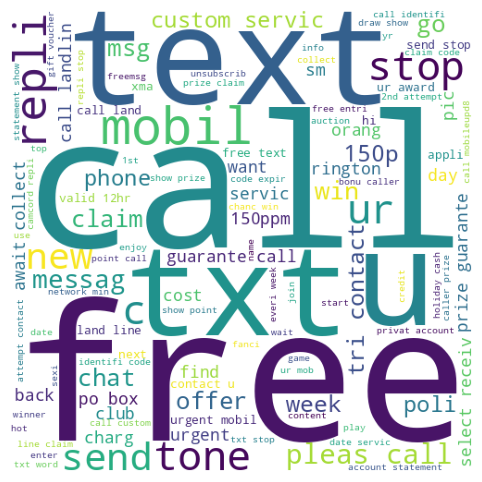

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc)
plt.axis("off")
plt.show()

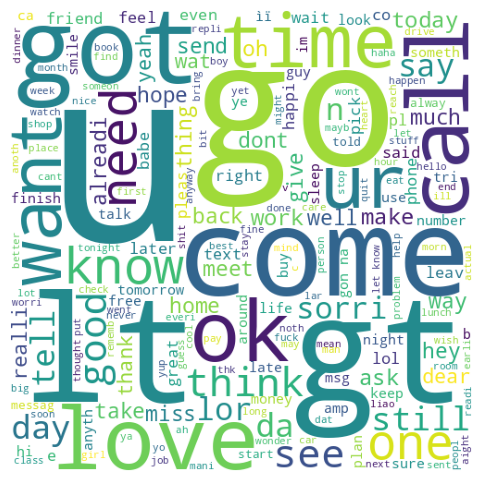

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12, 6))
plt.imshow(ham_wc)
plt.axis("off")
plt.show()

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,sale sale sale,14,3,0,sale sale sale
1,1,Limited time offer!!! SALE SALE SALE  Buy 1 G...,56,11,2,limit time offer sale sale sale buy 1 get 1 free
2,1,"Earn ?50,000 per month working from home! Sign...",54,11,3,earn per month work home sign
3,1,URGENT: Your bank account has been suspended. ...,71,12,2,urgent bank account suspend click link verifi
4,1,free free free,14,3,0,free free free


In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9969

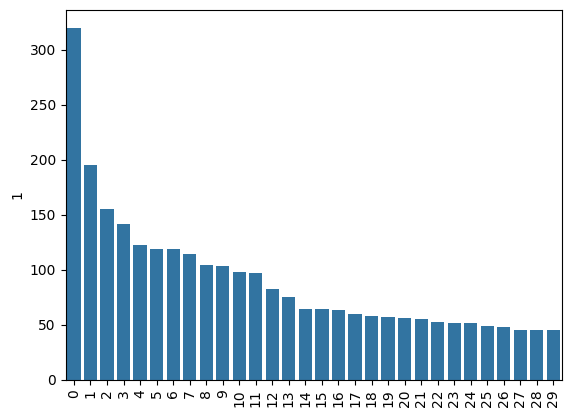

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


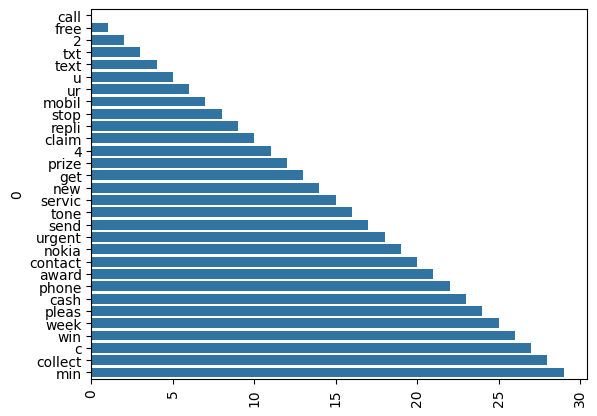

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#x=np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [ ]:
x.shape

(5174, 3000)

In [ ]:
y=df['target'].values

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1= gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.863768115942029
[[803 123]
 [ 18  91]]
0.4252336448598131


In [ ]:
mnb.fit(x_train,y_train)
y_pred2= mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729468599033816
[[926   0]
 [ 28  81]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3= bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.978743961352657
[[924   2]
 [ 20  89]]
0.978021978021978


In [ ]:
#tfidf --> MNB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test) # Corrected the typo here
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758454106280193, 0.9666666666666667)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
  print("for ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for  SVC
Accuracy -  0.9758454106280193
Precision -  0.9666666666666667
for  KN
Accuracy -  0.9265700483091788
Precision -  1.0
for  NB
Accuracy -  0.9729468599033816
Precision -  1.0
for  DT
Accuracy -  0.9391304347826087
Precision -  0.8026315789473685
for  LR
Accuracy -  0.961352657004831
Precision -  0.948051948051948
for  RF
Accuracy -  0.9710144927536232
Precision -  0.9876543209876543
for  AdaBoost
Accuracy -  0.9314009661835749
Precision -  0.796875
for  BgC
Accuracy -  0.9603864734299516
Precision -  0.8695652173913043
for  ETC
Accuracy -  0.9729468599033816
Precision -  0.9550561797752809
for  GBDT
Accuracy -  0.9507246376811594
Precision -  0.9142857142857143
for  xgb
Accuracy -  0.966183574879227
Precision -  0.9512195121951219


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
display(performance_df)

,Algorithm,Accuracy,Precision
1,KN,0.926570,1.000000
2,NB,0.972947,1.000000
5,RF,0.971014,0.987654
0,SVC,0.975845,0.966667
8,ETC,0.972947,0.955056
10,xgb,0.966184,0.951220
4,LR,0.961353,0.948052
9,GBDT,0.950725,0.914286
7,BgC,0.960386,0.869565
3,DT,0.939130,0.802632


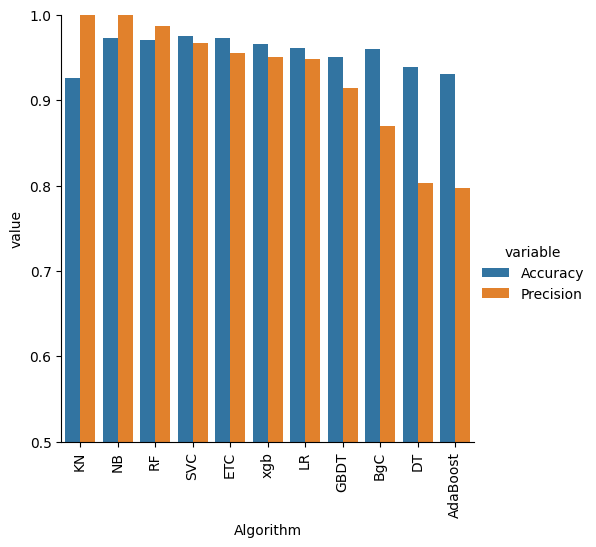

In [ ]:
melted_performance_df = pd.melt(performance_df, id_vars='Algorithm', var_name='variable', value_name='value')
sns.catplot(x='Algorithm', y='value', hue='variable', data=melted_performance_df, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))